<a href="https://colab.research.google.com/github/kris0425821/python_list/blob/main/17_2_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('emotion.csv')
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [4]:
df.shape

(16000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [7]:
df.isna().sum()

,0
text,0
label,0


In [10]:
df.label.value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


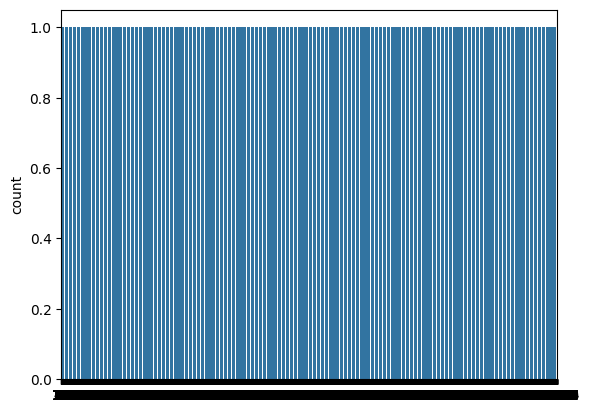

In [13]:
import seaborn as sns
sns.countplot(df.label)
x=df.label

In [12]:
df['text']=df['text'].apply(lambda x:"".join(x.lower() for x in x.split()))

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
df['text']=df['text'].apply(lambda x:"".join(x for x in x.split() if x not in stop))

In [19]:
!pip install textblob

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
df['text']=df['text'].apply(lambda x:"".join(Word(word).lemmatize() for word in x.split()))
df['text'].head()

,text
0,ididntfeelhumiliated
1,icangofromfeelingsohopelesstosodamnedhopefulju...
2,imgrabbingaminutetopostifeelgreedywrong
3,iameverfeelingnostalgicaboutthefireplaceiwillk...
4,iamfeelinggrouchy


In [23]:
X=df[['text']]
y=df[['text']]

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [31]:
print(x_train.shape,y_train.shape)

(12800, 1) (12800, 1)


In [32]:
print(x_test.shape,y_test.shape)

(3200, 1) (3200, 1)


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf.fit(df['text'])
xtrain_tfidf=tfidf.transform(x_train['text'])
xtest_tfidf=tfidf.transform(x_test['text'])

In [34]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
pclf=PassiveAggressiveClassifier()
pclf.fit(xtrain_tfidf,y_train)
pred=pclf.predict(xtest_tfidf)
print(metrics.classification_report(y_test,pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                                                                                                                                                                                                                                         precision    recall  f1-score   support

                                                                                                                                                                                               agiganticspiderclimbedovermyfaceandwhatismoreinmyownflat       0.00      0.00      0.00         1
                                                                                                                   agroupofyoungstersdressedinfadstalkedfoullanguageonabustheyalsoinsultedthepedestriansontheroadandwereimpolitetothepassengersofthebus       0.00      0.00      0.00         1
                                                                                                                                    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [36]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain_tfidf,y_train)
pred=model.predict(xtest_tfidf)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.